In [6]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Load the dataset
data = pd.read_csv('Mall_Customers.csv')

# Display the first few rows of the dataframe
print(data.head())

# Check for missing values
print(data.isnull().sum())

# Handle missing values
imputer_mean = SimpleImputer(strategy='mean')
imputer_mode = SimpleImputer(strategy='most_frequent')

# Impute numerical columns with mean
numerical_features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
data[numerical_features] = imputer_mean.fit_transform(data[numerical_features])

# Impute categorical columns with mode
categorical_features = ['Gender']
data[categorical_features] = imputer_mode.fit_transform(data[categorical_features])

# Encode the 'Gender' column
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

# Display the first few rows after preprocessing
print(data.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
   CustomerID  Gender   Age  Annual Income (k$)  Spending Score (1-100)
0           1       0  19.0                15.0                    39.0
1           2       0  21.0                15.0                    81.0
2           3       1  20.0                16.0                     6.0
3           4       1  23.0                16.0                    77.0
4           5       1  31.0                17.0              

In [7]:
from sklearn.preprocessing import StandardScaler

# Select relevant features for clustering
features = ['Age', 'Gender', 'Annual Income (k$)', 'Spending Score (1-100)']

# Standardize the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[features])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

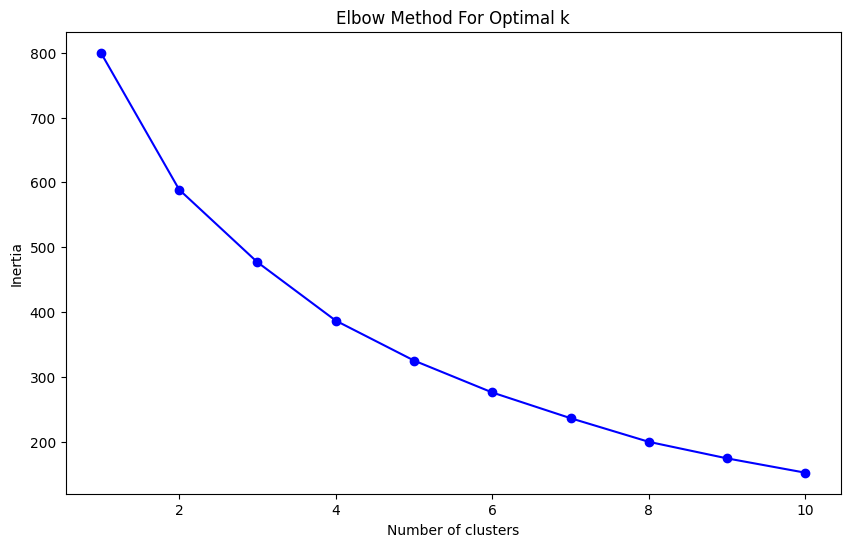

In [8]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine the optimal number of clusters using the elbow method
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [9]:
# Fit the K-means algorithm with the chosen number of clusters
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_scaled)

# Display the first few rows of the dataframe with the cluster labels
print(data.head())

   CustomerID  Gender   Age  Annual Income (k$)  Spending Score (1-100)  \
0           1       0  19.0                15.0                    39.0   
1           2       0  21.0                15.0                    81.0   
2           3       1  20.0                16.0                     6.0   
3           4       1  23.0                16.0                    77.0   
4           5       1  31.0                17.0                    40.0   

   Cluster  
0        3  
1        3  
2        2  
3        1  
4        1  


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.3016237438985174


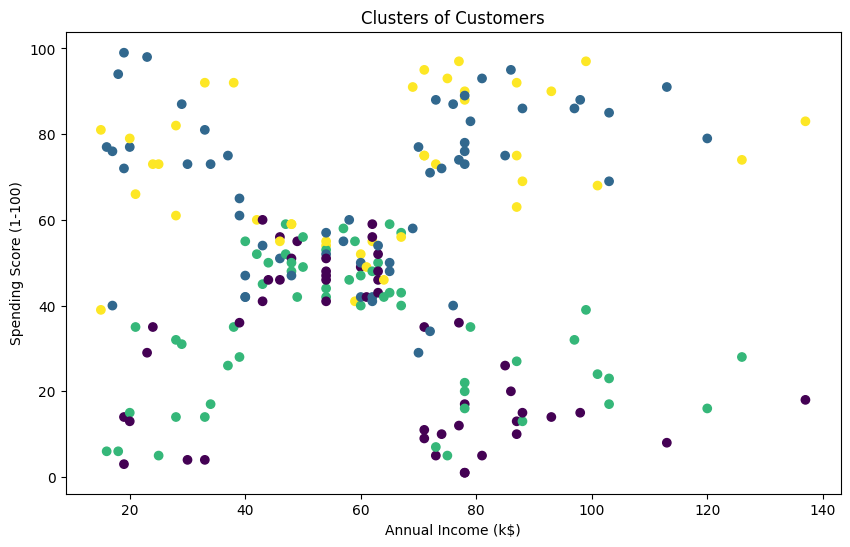

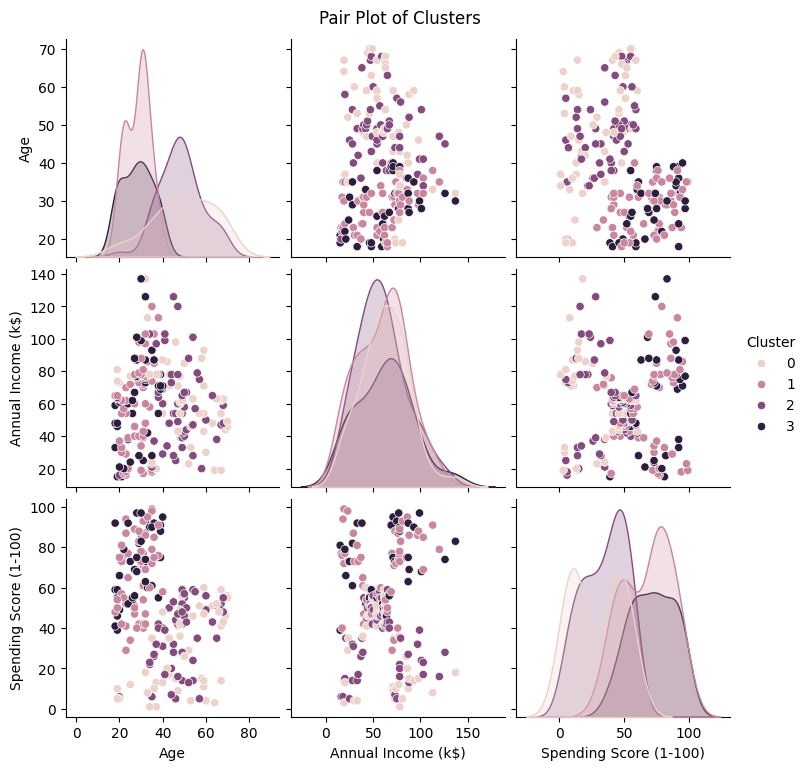

In [10]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score
silhouette_avg = silhouette_score(data_scaled, data['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Cluster'], cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Clusters of Customers')
plt.show()

# Pair plot of the clusters
import seaborn as sns

sns.pairplot(data, hue='Cluster', vars=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
plt.suptitle("Pair Plot of Clusters", y=1.02)
plt.show()